In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from einops import rearrange

In [8]:
data = np.load("../data.npz")
observations, actions = data["observations"], data["actions"]

In [3]:
observations.shape

(65536, 1024, 4)

In [13]:
df = pd.DataFrame.from_records(
    [
        (traj_idx, step_idx, *obs.tolist())
        for traj_idx, traj in enumerate(observations[:8])
        for step_idx, obs in enumerate(traj)
    ],
    columns=["traj", "time", "o1", "o2", "o3", "o4"],
)

<Axes: xlabel='o1', ylabel='o2'>

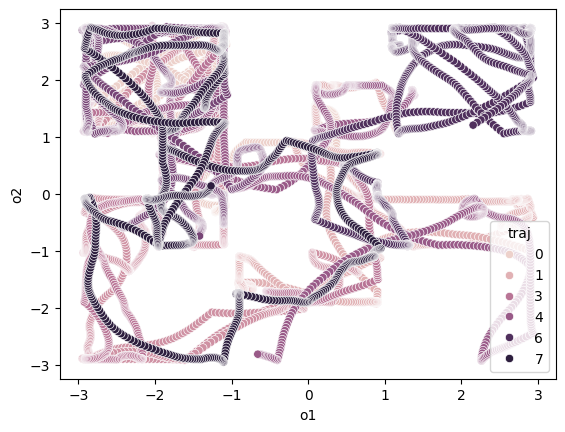

In [14]:
sns.scatterplot(data=df, x="o1", y="o2", hue="traj")

In [10]:
flat_actions = rearrange(actions[...], "... d -> (...) d")[:16_384]

In [11]:
flat_actions

array([[-0.93143013,  0.87503937],
       [-0.96311241,  1.        ],
       [-0.64887076,  0.92691564],
       ...,
       [ 0.0701312 ,  1.        ],
       [ 0.1229594 ,  0.58063824],
       [-0.38480771,  0.47160625]])